In [1]:
import pandas
import os
from os import listdir
from os.path import isfile, join
import re

In [2]:
targetDir = '/Users/Enya/Desktop/content-analysis-2018/Speeches'

In [3]:
def getText(x):
    reResults = re.findall(r'(TEXT:)(.*?)((END))', x.replace('\n', ' '), flags = re.M)
    return[t[1] for t in reResults]

def getDate(x) :
    reResults = re.findall(r'(DATE:)(.*?)(TITLE)', x.replace('\n', ' '))
    return[t[1] for t in reResults]

def getCategory(x):
    reResults = re.findall(r'(CATEGORY:)(.*?)(SPEECH)', x.replace('\n', ' '))
    return[t[1] for t in reResults]

def getTitle(x):
    reResults = re.findall(r'(TITLE:)(.*?)(TEXT)', x.replace('\n', ' '))
    return[t[1] for t in reResults]

In [4]:
speechestext = []
speechesdate = []
agency = []
title = []

for file in (file for file in os.scandir(targetDir) if file.is_file() and not file.name.startswith('.')):
    with open(file.path, encoding='utf-8') as f:
        workingText = f.read()
        workingText = str(workingText)
        goodText = getText(workingText)
        date = getDate(workingText)
        category = getCategory(workingText)
        speechtitle = getTitle(workingText)
        speechestext += goodText
        speechesdate += date
        agency += category
        title += speechtitle

speechesDF = pandas.DataFrame({'agency':agency, 'date' :speechesdate, 'title':title, 'text':speechestext})

In [5]:
print(speechesDF)

   agency                  date  \
0    DOS     December 01, 2016    
1    DOS     November 10, 2016    
2    DOS      October 10, 2016    
3    DOS      October 04, 2016    
4    DOS    September 28, 2016    
5    DOS    September 19, 2016    
6    DOS         June 03, 2016    
7    DOS          May 25, 2016    
8    DOS          May 25, 2016    
9    DOS        March 01, 2016    
10   DOS     February 26, 2016    
11   DOS     February 11, 2016    
12   DOS         July 29, 2015    
13   DOS          May 14, 2015    
14   DOS          May 04, 2015    
15   DOS     February 24, 2015    
16   DOS      January 13, 2015    
17   DOS        March 04, 2014    
18   DOS     December 03, 2013    
19   DOS      October 21, 2013    
20   DOS     November 26, 2012    
21   DOS      October 05, 2012    
22   DOS    September 18, 2012    
23   DOS       August 31, 2012    
24   DOS        March 07, 2012    
25   DOS     November 17, 2011    
26   DOS      October 31, 2011    
27   DOS      Octobe

In [6]:
import lucem_illud #pip install git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import nltk #the Natural Language Toolkit
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
from nltk.corpus import stopwords #For stopwords
import json #For API responses
import urllib.parse #For joining urls

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [7]:
speechesDF['tokenized-text'] = speechesDF['text'].apply(lambda x: nltk.word_tokenize(x))

In [8]:
speechesDF['word-counts'] = speechesDF['tokenized-text'].apply(lambda x: len(x))

In [9]:
print(speechesDF)

   agency                  date  \
0    DOS     December 01, 2016    
1    DOS     November 10, 2016    
2    DOS      October 10, 2016    
3    DOS      October 04, 2016    
4    DOS    September 28, 2016    
5    DOS    September 19, 2016    
6    DOS         June 03, 2016    
7    DOS          May 25, 2016    
8    DOS          May 25, 2016    
9    DOS        March 01, 2016    
10   DOS     February 26, 2016    
11   DOS     February 11, 2016    
12   DOS         July 29, 2015    
13   DOS          May 14, 2015    
14   DOS          May 04, 2015    
15   DOS     February 24, 2015    
16   DOS      January 13, 2015    
17   DOS        March 04, 2014    
18   DOS     December 03, 2013    
19   DOS      October 21, 2013    
20   DOS     November 26, 2012    
21   DOS      October 05, 2012    
22   DOS    September 18, 2012    
23   DOS       August 31, 2012    
24   DOS        March 07, 2012    
25   DOS     November 17, 2011    
26   DOS      October 31, 2011    
27   DOS      Octobe

In [11]:
stop_words_nltk = stopwords.words('english')
snowball = nltk.stem.snowball.SnowballStemmer('english')

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)


speechesDF['normalized-text'] = speechesDF['tokenized-text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))

In [18]:
speechesfdist = nltk.ConditionalFreqDist(((len(w), w) for w in speechesDF['normalized-text'].sum()))

In [19]:
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics
import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling

In [20]:
speechesCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
speechesVects = speechesCountVectorizer.fit_transform(speechesDF['text'])

In [21]:
speechesCountVectorizer.vocabulary_.get('cyberspace')

1549

In [22]:
speechesTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(speechesVects)
speechesTF = speechesTFTransformer.transform(speechesVects)

In [23]:
list(zip(speechesCountVectorizer.vocabulary_.keys(), speechesTF.data))[:20]

[('would', 0.006192151375533132),
 ('like', 0.01651915565340029),
 ('to', 0.3485429253286871),
 ('begin', 0.008685221349322399),
 ('by', 0.057593233841748775),
 ('thanking', 0.015583057346600806),
 ('the', 0.38523165431065415),
 ('un', 0.03808545848968145),
 ('counter', 0.17510021417264782),
 ('terrorism', 0.10943763385790488),
 ('committee', 0.0210894425644009),
 ('ctc', 0.03752378695624622),
 ('and', 0.4035760188016377),
 ('executive', 0.00983777221787942),
 ('directorate', 0.014559700686820718),
 ('cted', 0.01876189347812311),
 ('for', 0.08713573133217177),
 ('organizing', 0.014559700686820718),
 ('this', 0.07037284722288567),
 ('special', 0.011864057480844702)]

In [38]:
speechesTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
speechesTFVects = speechesTFVectorizer.fit_transform(speechesDF['text'])

In [61]:
try:
    print(speechesTFVectorizer.vocabulary_['cyberspace'])
except KeyError:
    print('cyber is missing')
    print('The available words are: {} ...'.format(list(speechesTFVectorizer.vocabulary_.keys())[:20]))

cyber is missing
The available words are: ['begin', 'counter', 'terrorism', 'committee', 'executive', 'special', 'meeting', 'technical', 'morning', 'pleased', 'participate', 'december', 'issue', 'challenging', 'nature', 'terrorist', 'groups', 'especially', 'isil', 'known'] ...


In [49]:
numClusters =2
km = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')

In [50]:
km.fit(speechesTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [51]:
speechesDF['kmeans_predictions'] = km.labels_
speechesDF

,agency,date,text,title,tokenized-text,word-counts,normalized-text,kmeans_predictions
0,DOS,"December 01, 2016",I would like to begin by thanking the UN Coun...,Preventing the Exploitation of Information an...,"[I, would, like, to, begin, by, thanking, the,...",1823,"[would, like, begin, thank, un, committe, ctc,...",0
1,DOS,"November 10, 2016",Thank you to Saira for that kind introduction...,Remarks on International Law and Stability,"[Thank, you, to, Saira, for, that, kind, intro...",5935,"[thank, saira, kind, introduct, thank, miller,...",0
2,DOS,"October 10, 2016",Good morning! Thank you to Prime Minister Lee...,Keynote Address at the Singapore Internationa...,"[Good, morning, !, Thank, you, to, Prime, Mini...",1763,"[good, morn, thank, prime, minist, lee, govern...",0
3,DOS,"October 04, 2016","Hello, My name is Chris Painter, and I am the...",Video Remarks on Cybersecurity Awareness Mont...,"[Hello, ,, My, name, is, Chris, Painter, ,, an...",487,"[hello, name, chris, painter, coordin, cyber, ...",1
4,DOS,"September 28, 2016","Introduction. Chairman Gardner, Ranking Membe...",The Persistent Threat of North Korea and Deve...,"[Introduction, ., Chairman, Gardner, ,, Rankin...",2405,"[introduct, chairman, gardner, rank, member, c...",0
5,DOS,"September 19, 2016","Chairman Donilon, Vice Chairman Palmisano, an...",Statement Before the Presidential Commission ...,"[Chairman, Donilon, ,, Vice, Chairman, Palmisa...",1661,"[chairman, donilon, vice, chairman, palmisano,...",0
6,DOS,"June 03, 2016",So what do zombies have to do with diplomacy?...,TEDx Tysons Talk,"[So, what, do, zombies, have, to, do, with, di...",2475,"[zombi, diplomaci, well, year, ago, bad, guy, ...",1
7,DOS,"May 25, 2016","MODERATOR: Thank you, and thanks to everyone ...",Briefing on the State Department Inspector Ge...,"[MODERATOR, :, Thank, you, ,, and, thanks, to,...",1208,"[moder, thank, thank, everyon, join, us, relat...",1
8,DOS,"May 25, 2016","Chairman Gardner, Ranking Member Cardin, memb...",International Cybersecurity Strategy: Deterri...,"[Chairman, Gardner, ,, Ranking, Member, Cardin...",5220,"[chairman, gardner, rank, member, cardin, memb...",0
9,DOS,"March 01, 2016","Good afternoon, and thank you for that warm w...",Remarks by Attorney General Loretta E. Lynch ...,"[Good, afternoon, ,, and, thank, you, for, tha...",2294,"[good, afternoon, thank, warm, welcom, want, t...",1


In [52]:
terms = speechesTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')


Top terms per cluster:
Cluster 0:
 norms
 cicte
 behavior
 north
 korea
 stability
 consensus
 cybercrime
 conflict
 strategy


Cluster 1:
 really
 dhs
 homeland
 nation
 federal
 space
 awareness
 companies
 systems
 different




In [53]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(speechesTFVects.toarray())
reduced_data = pca.transform(speechesTFVects.toarray())

In [256]:
components = pca.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

In [257]:
len(set(speechesDF['agency']))

2

In [258]:
colordict = {
' DOS ': 'green',
' DHS ': 'red'
    }
colors = [colordict[c] for c in speechesDF['agency']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([(' DOS ', 'green'), (' DHS ', 'red')])


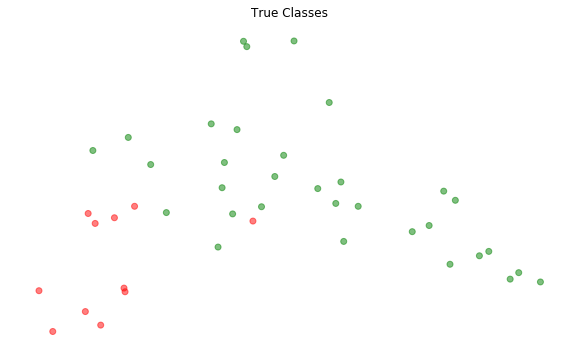

In [259]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

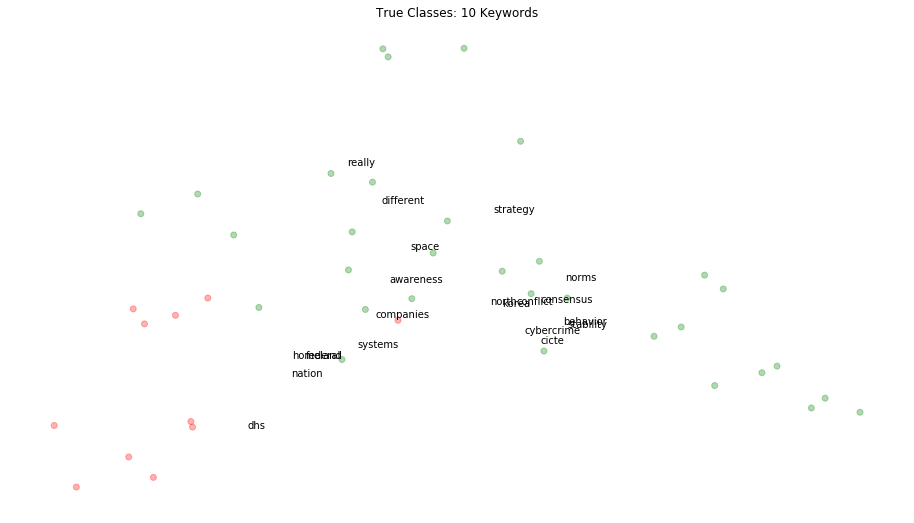

In [261]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.3, label = colors)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('True Classes: 10 Keywords')
plt.show()

In [72]:
speechesCoocMat = speechesTFVects * speechesTFVects.T
speechesCoocMat.setdiag(0)

In [73]:
selectIndices = []
indexToCat = []
for c in set(speechesDF['agency']):
    selectIndices += list(speechesDF[speechesDF['agency'] == c].index)[:50]
    indexToCat += [c] * 50

In [74]:
subCoocMat = speechesCoocMat[selectIndices,:][:,selectIndices]

In [75]:
linkage_matrix = scipy.cluster.hierarchy.ward(subCoocMat.toarray())
linkage_matrix[:10]

/anaconda3/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([[11.        , 37.        ,  0.2848596 ,  2.        ],
       [15.        , 20.        ,  0.30414969,  2.        ],
       [ 7.        , 18.        ,  0.34241938,  2.        ],
       [21.        , 25.        ,  0.3469917 ,  2.        ],
       [ 0.        , 14.        ,  0.40079383,  2.        ],
       [45.        , 46.        ,  0.40576627,  4.        ],
       [31.        , 44.        ,  0.4184324 ,  3.        ],
       [32.        , 35.        ,  0.44927515,  2.        ],
       [36.        , 42.        ,  0.46216284,  2.        ],
       [43.        , 48.        ,  0.47217778,  6.        ]])

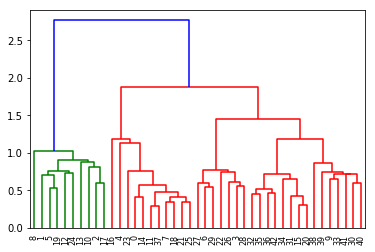

In [76]:
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)


In [77]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

speechesDF['reduced-tokens'] = speechesDF['normalized-text'].apply(lambda x: dropMissing(x, speechesTFVectorizer.vocabulary_.keys()))

In [79]:
dictionary = gensim.corpora.Dictionary(speechesDF['reduced-tokens'])
corpus = [dictionary.doc2bow(text) for text in speechesDF['reduced-tokens']]
gensim.corpora.MmCorpus.serialize('speeches.mm', corpus)
speechesmm = gensim.corpora.MmCorpus('speeches.mm')

In [80]:
speecheslda = gensim.models.ldamodel.LdaModel(corpus=speechesmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

In [81]:
speeches1Bow = dictionary.doc2bow(speechesDF['reduced-tokens'][0])
speeches1lda = speecheslda[speeches1Bow]
print("The topics of the text: {}".format(speechesDF['date'][0]))
print("are: {}".format(speeches1lda))

The topics of the text:  December 01, 2016 
are: [(6, 0.9951082)]


In [91]:
speechesldaDF = pandas.DataFrame({
        'date' : speechesDF['date'],
        'topics' : [speecheslda[dictionary.doc2bow(l)] for l in speechesDF['reduced-tokens']]
    })

In [92]:
speechestopicsProbDict = {i : [0] * len(speechesldaDF) for i in range(speecheslda.num_topics)}

for index, topicTuples in enumerate(speechesldaDF['topics']):
    for topicNum, prob in topicTuples:
        speechestopicsProbDict[topicNum][index] = prob

for topicNum in range(speecheslda.num_topics):
    speechesldaDF['topic_{}'.format(topicNum)] = speechestopicsProbDict[topicNum]

speechesldaDF

,date,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,"December 01, 2016","[(6, 0.9951082)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.995108,0.000000,0.000000,0.000000
1,"November 10, 2016","[(4, 0.48086596), (6, 0.51746386)]",0.000000,0.000000,0.000000,0.000000,0.480866,0.000000,0.517464,0.000000,0.000000,0.000000
2,"October 10, 2016","[(1, 0.95787644), (6, 0.03660921)]",0.000000,0.957876,0.000000,0.000000,0.000000,0.000000,0.036609,0.000000,0.000000,0.000000
3,"October 04, 2016","[(1, 0.9767156)]",0.000000,0.976716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"September 28, 2016","[(2, 0.11150359), (6, 0.876708)]",0.000000,0.000000,0.111504,0.000000,0.000000,0.000000,0.876708,0.000000,0.000000,0.000000
5,"September 19, 2016","[(1, 0.36871096), (2, 0.24068418), (4, 0.26064...",0.000000,0.368711,0.240684,0.000000,0.260647,0.000000,0.126232,0.000000,0.000000,0.000000
6,"June 03, 2016","[(1, 0.8882028), (2, 0.10699351)]",0.000000,0.888203,0.106994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"May 25, 2016","[(8, 0.98980415)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.989804,0.000000
8,"May 25, 2016","[(2, 0.09150649), (3, 0.04478333), (4, 0.18964...",0.000000,0.000000,0.091506,0.044783,0.189642,0.000000,0.671780,0.000000,0.000000,0.000000
9,"March 01, 2016","[(1, 0.28103453), (3, 0.6947804), (6, 0.020620...",0.000000,0.281035,0.000000,0.694780,0.000000,0.000000,0.020620,0.000000,0.000000,0.000000


In [93]:
speechesldaDFV = speechesldaDF[:10][['topic_%d' %x for x in range(10)]]
speechesldaDFVisN = speechesldaDF[:10][['date']]
speechesldaDFVis = speechesldaDFV.as_matrix(columns=None)
speechesldaDFVisNames = speechesldaDFVisN.as_matrix(columns=None)
speechesldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.995108,0.0,0.000000,0.0
1,0.0,0.000000,0.000000,0.000000,0.480866,0.0,0.517464,0.0,0.000000,0.0
2,0.0,0.957876,0.000000,0.000000,0.000000,0.0,0.036609,0.0,0.000000,0.0
3,0.0,0.976716,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.000000,0.111504,0.000000,0.000000,0.0,0.876708,0.0,0.000000,0.0
5,0.0,0.368711,0.240684,0.000000,0.260647,0.0,0.126232,0.0,0.000000,0.0
6,0.0,0.888203,0.106994,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
7,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.989804,0.0
8,0.0,0.000000,0.091506,0.044783,0.189642,0.0,0.671780,0.0,0.000000,0.0
9,0.0,0.281035,0.000000,0.694780,0.000000,0.0,0.020620,0.0,0.000000,0.0


In [96]:
speechestopicsDict = {}
for topicNum in range(speecheslda.num_topics):
    topicWords = [w for w, p in speecheslda.show_topic(topicNum)]
    speechestopicsDict['Topic_{}'.format(topicNum)] = topicWords

speecheswordRanksDF = pandas.DataFrame(speechestopicsDict)
speecheswordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,network,nation,nation,nation,nation,nation,north,north,share,nation
1,share,network,partner,effort,space,network,nation,korea,report,network
2,effort,effort,share,american,network,effort,korea,region,nation,right
3,nation,thing,north,network,share,problem,network,effort,senior,partner
4,say,right,korea,tool,partner,thing,question,partner,email,effort
5,server,program,effort,share,effort,share,share,network,north,region
6,virtual,crime,network,question,conduct,behavior,terrorist,behavior,network,thing
7,homeland,partnership,right,framework,set,point,effort,right,korea,server
8,partner,sure,question,terrorist,behavior,site,partner,nation,effort,question
9,send,share,area,benefit,conflict,server,region,implement,past,share


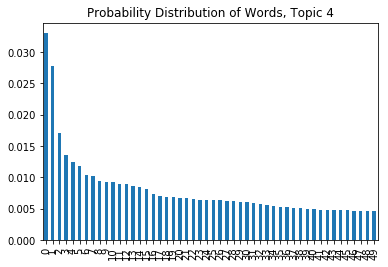

In [97]:
speechestopic4_df = pandas.DataFrame(speecheslda.show_topic(4, topn=50))
plt.figure()
speechestopic4_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 4')
plt.show()

NameError: name 'topic_labels' is not defined

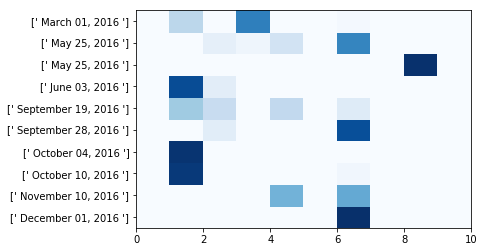

In [99]:
plt.pcolor(speechesldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(speechesldaDFVis.shape[0])+0.5, speechesldaDFVisNames);
plt.xticks(np.arange(speechesldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [116]:
speechesDF['tokenized-sents'] = speechesDF['text'].apply(lambda x: 
                                                               [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
speechesDF['normalized-sents'] = speechesDF['tokenized-sents'].apply(lambda x: 
                                                                           [lucem_illud.normalizeTokens(s, 
                                                                                           stopwordLst = lucem_illud.stop_words_basic, 
                                                                                           stemmer = None) 
                                                                            for s in x])

In [117]:
speechesW2V = gensim.models.word2vec.Word2Vec(speechesDF['normalized-sents'].sum())

In [118]:
speechesW2V.wv.syn0

array([[-0.9143755 ,  0.12648834,  0.47155225, ...,  0.19010769,
         1.1274949 , -0.10891317],
       [-0.91182756,  0.10767096,  0.46626228, ...,  0.18234205,
         1.1135173 , -0.10725079],
       [-0.924417  ,  0.12986596,  0.4809614 , ...,  0.19625863,
         1.1449904 , -0.11617443],
       ...,
       [-0.07285485,  0.01135342,  0.03945694, ...,  0.01107926,
         0.08696155, -0.01300361],
       [-0.0956758 ,  0.00971223,  0.04698201, ...,  0.02022969,
         0.11825011, -0.00675027],
       [-0.06627797,  0.00510222,  0.03243141, ...,  0.01207639,
         0.0821555 , -0.00676715]], dtype=float32)

In [119]:
speechesW2V.wv.index2word[2]

'states'

In [123]:
print("A {} dimesional vector:".format(speechesW2V['cyberspace'].shape[0]))
speechesW2V['cyberspace']

A 100 dimesional vector:


array([-0.8785088 ,  0.10924983,  0.44332907,  0.4147095 ,  0.13502593,
       -0.06808072,  0.15944609,  0.14161816,  0.6704333 , -0.29445842,
       -0.2540732 ,  0.2944227 , -0.22780786, -0.30602142, -0.35376576,
        0.46470457,  0.3580682 ,  0.49576116, -0.583721  , -0.1436068 ,
       -0.60934925,  0.12513773, -0.16309445,  0.20983815, -0.14555326,
       -0.5375337 ,  0.50844437, -0.11322448, -0.4419206 , -0.16621299,
        0.31153065,  0.48045874, -0.11615196, -0.5776989 ,  0.56821096,
       -0.23285598, -0.75550807, -0.41067028, -0.40856007, -1.0907322 ,
        0.21234356,  0.30596524,  1.0215837 ,  0.13478625, -0.01066921,
       -0.12536113,  0.10699225, -0.16573827,  0.17492203,  0.32499444,
        0.26852694, -0.64148724,  0.25716877,  0.00862276,  0.24837068,
       -0.171254  , -0.39514065,  0.06909016,  0.75314397, -0.83691955,
        0.15420207,  0.2091078 ,  0.47085094,  0.22187938, -0.12335885,
       -0.49138507,  0.12633586, -0.9408712 , -0.24482602, -0.58

In [124]:
speechesW2V.most_similar('cyberspace')

[('international', 0.9999170303344727),
 ('development', 0.9999104738235474),
 ('state', 0.999908447265625),
 ('efforts', 0.9999064803123474),
 ('may', 0.9999062418937683),
 ('network', 0.9999029636383057),
 ('space', 0.9998986721038818),
 ('including', 0.9998968839645386),
 ('us', 0.9998967051506042),
 ('cyber', 0.9998962879180908)]

In [125]:
speechesW2V.most_similar('cyber')

[('cybersecurity', 0.9999515414237976),
 ('one', 0.9999491572380066),
 ('global', 0.999947726726532),
 ('network', 0.9999459981918335),
 ('new', 0.9999440908432007),
 ('also', 0.999942421913147),
 ('us', 0.9999406933784485),
 ('online', 0.9999404549598694),
 ('internet', 0.9999403953552246),
 ('attack', 0.9999398589134216)]

In [126]:
speechesW2V.most_similar('cybersecurity')

[('cyber', 0.9999514818191528),
 ('network', 0.9999485015869141),
 ('also', 0.9999437928199768),
 ('national', 0.9999396204948425),
 ('security', 0.9999386072158813),
 ('companies', 0.9999384880065918),
 ('us', 0.9999368190765381),
 ('help', 0.9999361038208008),
 ('may', 0.9999359250068665),
 ('need', 0.9999349117279053)]

In [129]:
speechesW2V.most_similar('space')

[('national', 0.9999438524246216),
 ('cyber', 0.9999392032623291),
 ('may', 0.999937891960144),
 ('us', 0.9999359846115112),
 ('working', 0.9999332427978516),
 ('cybersecurity', 0.9999326467514038),
 ('important', 0.9999308586120605),
 ('efforts', 0.9999298453330994),
 ('take', 0.9999294281005859),
 ('people', 0.9999293684959412)]

In [131]:
speechesW2V.doesnt_match(['cyber', 'cyberspace', 'cybersecurity','space','security'])

'cyberspace'

In [133]:
speechesW2V.most_similar(positive=['cyberspace', 'domestic'], negative = ['international'])

[('federal', 0.9996736645698547),
 ('within', 0.9996576309204102),
 ('network', 0.999643087387085),
 ('computer', 0.999642550945282),
 ('may', 0.9996399283409119),
 ('companies', 0.9996363520622253),
 ('cyber', 0.9996356964111328),
 ('threat', 0.9996296167373657),
 ('cybersecurity', 0.9996280074119568),
 ('time', 0.999626100063324)]

In [134]:
speechesW2V.most_similar(positive=['cyberspace', 'international'], negative = ['domestic'])

[('norms', 0.9996587038040161),
 ('law', 0.9996358752250671),
 ('mission', 0.9995936155319214),
 ('development', 0.9995832443237305),
 ('know', 0.9995794892311096),
 ('responsible', 0.9995759725570679),
 ('promote', 0.9995738863945007),
 ('state', 0.9995644688606262),
 ('world', 0.999563992023468),
 ('develop', 0.9995631575584412)]

In [136]:
def cos_difference(embedding,word1,word2):
    return sklearn.metrics.pairwise.cosine_similarity(embedding[word1].reshape(1,-1),embedding[word2].reshape(1,-1))

estimatesB=[]
for x in range(20):
    speechesW2VB = gensim.models.word2vec.Word2Vec(speechesDF['normalized-sents'].sample(frac=1.0, replace=True).sum())
    try:
        estimatesB.append(cos_difference(speechesW2VB, 'cyberspace', 'domestic')[0,0])
    except KeyError:
        #Missing one of the words from the vocab
        pass
                                                      
estimatesB.sort()         
estimatesB

[0.99747217,
 0.9991156,
 0.99932444,
 0.99958897,
 0.99959654,
 0.99959904,
 0.99962,
 0.99962395,
 0.9996435,
 0.9996725,
 0.99967605,
 0.9996917,
 0.9997046,
 0.99972117,
 0.9997282,
 0.99973553,
 0.9997366,
 0.9997412,
 0.9997733,
 0.9997802]

In [137]:
print("The 90% confidence interval for the cosine distance between war and unwinnable is:\n",estimatesB[1], estimatesB[-2])

The 90% confidence interval for the cosine distance between war and unwinnable is:
 0.9991156 0.9997733


In [139]:
numWords = 150
targetWords = speechesW2V.wv.index2word[:numWords]

In [140]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(speechesW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-0.9143755 ,  0.12648834,  0.47155225, ...,  0.19010769,
         1.1274949 , -0.10891317],
       [-0.91182756,  0.10767096,  0.46626228, ...,  0.18234205,
         1.1135173 , -0.10725079],
       [-0.924417  ,  0.12986596,  0.4809614 , ...,  0.19625863,
         1.1449904 , -0.11617443],
       ...,
       [-0.50719887,  0.06545039,  0.26177305, ...,  0.10443439,
         0.63051087, -0.06082686],
       [-0.5389898 ,  0.06661776,  0.2755291 , ...,  0.11712773,
         0.6671134 , -0.05971741],
       [-0.62958705,  0.07990106,  0.32336637, ...,  0.13069591,
         0.77542055, -0.07651114]], dtype=float32)

In [141]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(reducedPCA_data)

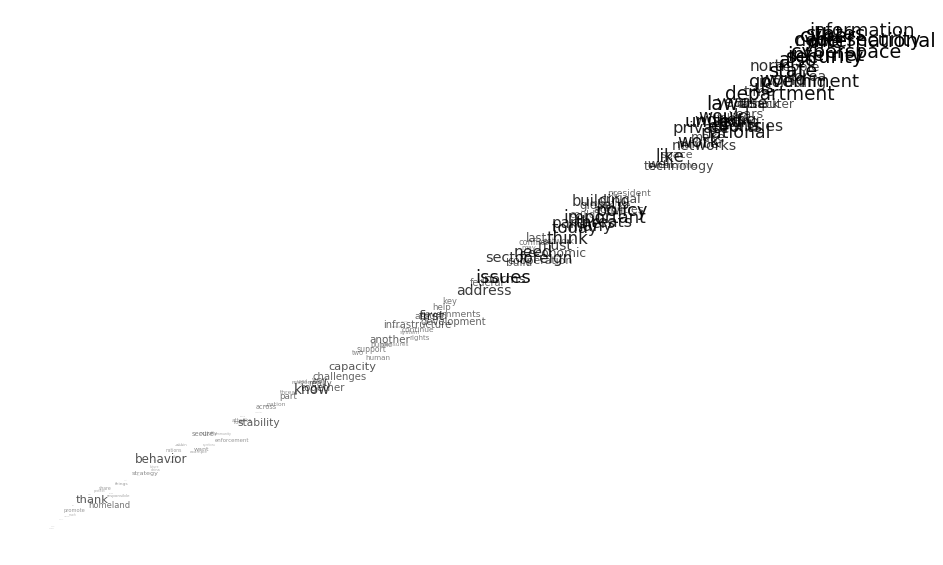

In [142]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, 
                (tsneWords[:, 0][i],tsneWords[:, 1][i]), 
                size =  20 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2)
plt.xticks(())
plt.yticks(())
plt.show()

In [151]:
DOSspeechesW2V = gensim.models.word2vec.Word2Vec(speechesDF['normalized-sents'][0:31].sum())
DHSspeechesW2V = gensim.models.word2vec.Word2Vec(speechesDF['normalized-sents'][32:42].sum())

In [153]:
display(DOSspeechesW2V.most_similar('cyberspace'))
display(DHSspeechesW2V.most_similar('cyberspace'))

[('cyber', 0.9999352693557739),
 ('efforts', 0.9999255537986755),
 ('state', 0.9999251961708069),
 ('including', 0.9999241828918457),
 ('international', 0.9999226331710815),
 ('countries', 0.9999225735664368),
 ('development', 0.9999213814735413),
 ('cooperation', 0.999919593334198),
 ('us', 0.9999194145202637),
 ('cybercrime', 0.9999179244041443)]

[('cyber', 0.9508532285690308),
 ('cybersecurity', 0.9455675482749939),
 ('government', 0.9442428350448608),
 ('private', 0.9439975023269653),
 ('federal', 0.9420256614685059),
 ('security', 0.9412347078323364),
 ('department', 0.9404594302177429),
 ('nation', 0.9393349289894104),
 ('people', 0.9365335702896118),
 ('years', 0.9363147020339966)]

In [154]:
display(DOSspeechesW2V.most_similar('cyber'))
display(DHSspeechesW2V.most_similar('cyber'))

[('internet', 0.9999605417251587),
 ('states', 0.9999570250511169),
 ('attack', 0.9999511241912842),
 ('global', 0.9999505877494812),
 ('us', 0.9999481439590454),
 ('one', 0.9999478459358215),
 ('also', 0.9999473690986633),
 ('cybersecurity', 0.9999470710754395),
 ('security', 0.9999470114707947),
 ('cybercrime', 0.9999468922615051)]

[('government', 0.9774525165557861),
 ('private', 0.9752260446548462),
 ('cybersecurity', 0.9732471108436584),
 ('security', 0.9719692468643188),
 ('networks', 0.9705813527107239),
 ('federal', 0.9694167375564575),
 ('information', 0.9693840742111206),
 ('nation', 0.9659606218338013),
 ('department', 0.9654802083969116),
 ('people', 0.965298056602478)]

In [155]:
display(DOSspeechesW2V.most_similar('security'))
display(DHSspeechesW2V.most_similar('security'))

[('cyber', 0.9999470114707947),
 ('new', 0.9999457001686096),
 ('cybersecurity', 0.9999437928199768),
 ('national', 0.999941885471344),
 ('economic', 0.9999411106109619),
 ('also', 0.9999382495880127),
 ('cooperation', 0.9999359250068665),
 ('internet', 0.9999358654022217),
 ('including', 0.9999323487281799),
 ('global', 0.9999322891235352)]

[('cybersecurity', 0.972662091255188),
 ('cyber', 0.9719691872596741),
 ('government', 0.9684157967567444),
 ('dhs', 0.965388298034668),
 ('networks', 0.9637857675552368),
 ('nation', 0.9634954333305359),
 ('department', 0.9615504741668701),
 ('also', 0.9614482522010803),
 ('critical', 0.9609655141830444),
 ('private', 0.960837721824646)]

In [156]:
display(DOSspeechesW2V.most_similar('cybersecurity'))
display(DHSspeechesW2V.most_similar('cybersecurity'))

[('cyber', 0.9999470710754395),
 ('security', 0.9999437928199768),
 ('national', 0.999931812286377),
 ('states', 0.9999288320541382),
 ('information', 0.9999280571937561),
 ('also', 0.9999257326126099),
 ('government', 0.9999251961708069),
 ('may', 0.9999241232872009),
 ('attack', 0.9999232888221741),
 ('internet', 0.999921441078186)]

[('cyber', 0.9732469320297241),
 ('security', 0.9726620316505432),
 ('government', 0.9702670574188232),
 ('information', 0.9624351263046265),
 ('networks', 0.960116446018219),
 ('national', 0.9579658508300781),
 ('also', 0.9574430584907532),
 ('federal', 0.9560151696205139),
 ('dhs', 0.9557242393493652),
 ('years', 0.9557081460952759)]

In [165]:
numWords = 75
DOStargetWords = DOSspeechesW2V.wv.index2word[:numWords]
DHStargetWords = DHSspeechesW2V.wv.index2word[:numWords]


In [166]:
DOSwordsSubMatrix = []
for word in DOStargetWords:
    DOSwordsSubMatrix.append(DOSspeechesW2V[word])
DOSwordsSubMatrix = np.array(DOSwordsSubMatrix)
DOSwordsSubMatrix

array([[-1.0264789 ,  0.06428577,  0.43712187, ...,  0.09718296,
         1.1731    , -0.06784919],
       [-0.93298006,  0.04687863,  0.39599934, ...,  0.08695503,
         1.0531931 , -0.05796068],
       [-0.93589914,  0.06021142,  0.40281856, ...,  0.09307065,
         1.0728569 , -0.06294874],
       ...,
       [-0.6807299 ,  0.0428069 ,  0.293842  , ...,  0.06820159,
         0.7779072 , -0.04125362],
       [-0.6294911 ,  0.03888376,  0.26751316, ...,  0.06107599,
         0.7156996 , -0.0421243 ],
       [-0.60065305,  0.04064031,  0.25679454, ...,  0.0576935 ,
         0.6868029 , -0.03711263]], dtype=float32)

In [169]:
DHSwordsSubMatrix = []
for word in DHStargetWords:
    DHSwordsSubMatrix.append(DHSspeechesW2V[word])
DHSwordsSubMatrix = np.array(DHSwordsSubMatrix)
DHSwordsSubMatrix

array([[-0.03358567, -0.00237687,  0.04996407, ..., -0.0061808 ,
         0.03117233,  0.00884717],
       [-0.02755752, -0.0034028 ,  0.04305526, ..., -0.00878347,
         0.01602294,  0.00566746],
       [-0.02621231, -0.00288366,  0.03777405, ..., -0.00663583,
         0.01550763,  0.0135694 ],
       ...,
       [-0.0051    , -0.00020509,  0.0189344 , ..., -0.00600348,
         0.00433816,  0.00102281],
       [-0.01436943, -0.00436439,  0.01751481, ...,  0.00135125,
         0.00538298,  0.00234743],
       [-0.01646486, -0.0050707 ,  0.02527924, ..., -0.00399589,
         0.0156896 ,  0.0008509 ]], dtype=float32)

In [167]:
DOSpcaWords = sklearn.decomposition.PCA(n_components = 50).fit(DOSwordsSubMatrix)
DOSreducedPCA_data = DOSpcaWords.transform(DOSwordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
DOStsneWords = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(DOSreducedPCA_data)

In [171]:
DHSpcaWords = sklearn.decomposition.PCA(n_components = 50).fit(DHSwordsSubMatrix)
DHSreducedPCA_data = DHSpcaWords.transform(DHSwordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
DHStsneWords = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(DHSreducedPCA_data)

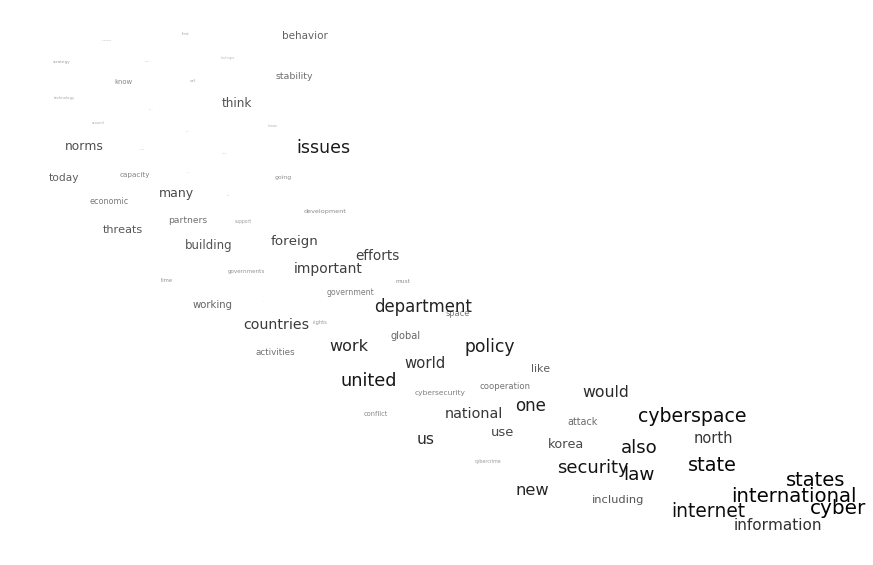

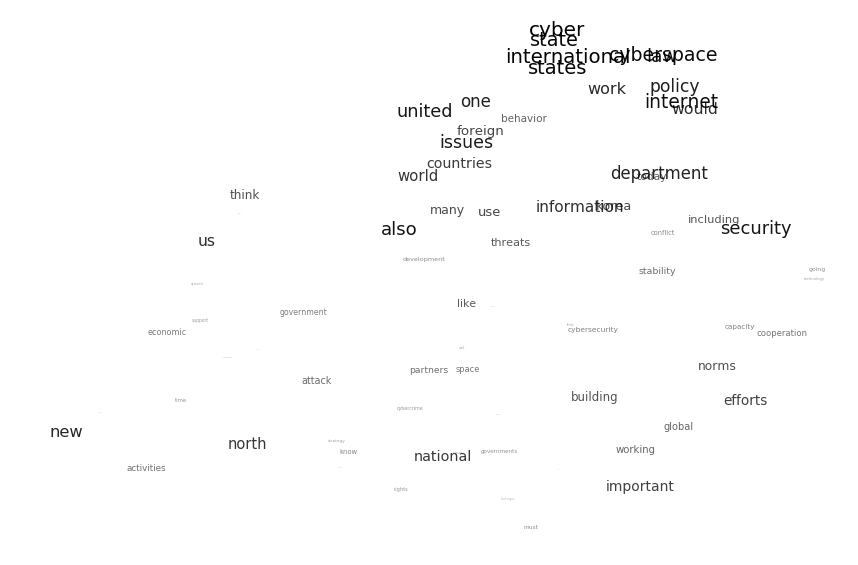

In [172]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(DOStsneWords[:, 0], DOStsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(DOStargetWords):
    ax.annotate(word, 
                (DOStsneWords[:, 0][i],DOStsneWords[:, 1][i]), 
                size =  20 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2)
plt.xticks(())
plt.yticks(())
plt.show()

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(DHStsneWords[:, 0], DHStsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(DOStargetWords):
    ax.annotate(word, 
                (DHStsneWords[:, 0][i],DHStsneWords[:, 1][i]), 
                size =  20 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2)
plt.xticks(())
plt.yticks(())
plt.show()

In [202]:
keywords = ['cyber', 'cyberspace', 'security', 'international', 'national', 'cybersecurity',  ]

In [212]:
#ALL
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = speechesW2V.wv[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, speechesW2V.wv[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

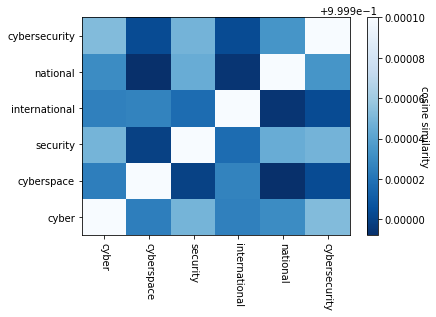

In [213]:
#ALL
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='Blues_r')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [214]:
#DOS
DOSheatmapMatrix = []
for DOStagOuter in keywords:
    DOScolumn = []
    DOStagVec = DOSspeechesW2V.wv[DOStagOuter].reshape(1, -1)
    for DOStagInner in keywords:
        DOScolumn.append(sklearn.metrics.pairwise.cosine_similarity(DOStagVec, DOSspeechesW2V.wv[DOStagInner].reshape(1, -1))[0][0])
    DOSheatmapMatrix.append(DOScolumn)
DOSheatmapMatrix = np.array(DOSheatmapMatrix)

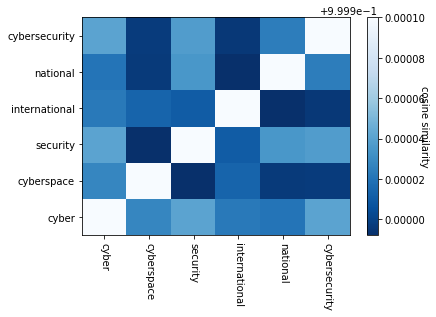

In [215]:
#DOS
fig, ax = plt.subplots()
DOShmap = ax.pcolor(DOSheatmapMatrix, cmap='Blues_r')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(DOSheatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(DOSheatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [216]:
#DHS
DHSheatmapMatrix = []
for DHStagOuter in keywords:
    DHScolumn = []
    DHStagVec = DHSspeechesW2V.wv[DHStagOuter].reshape(1, -1)
    for DHStagInner in keywords:
        DHScolumn.append(sklearn.metrics.pairwise.cosine_similarity(DHStagVec, DHSspeechesW2V.wv[DHStagInner].reshape(1, -1))[0][0])
    DHSheatmapMatrix.append(DHScolumn)
DHSheatmapMatrix = np.array(DHSheatmapMatrix)

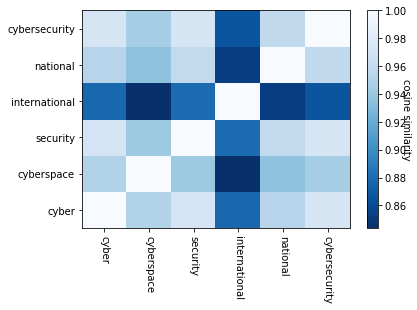

In [217]:
#DHS
fig, ax = plt.subplots()
hmap = ax.pcolor(DHSheatmapMatrix, cmap='Blues_r')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(DHSheatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(DHSheatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [218]:
#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

In [219]:
lucem_illud.setupStanfordNLP()

Starting downloads, this will take 5-10 minutes
../stanford-NLP/parser already exists, skipping download
../stanford-NLP/ner already exists, skipping download
../stanford-NLP/postagger already exists, skipping download
../stanford-NLP/core already exists, skipping download
[100%]Done setting up the Stanford NLP collection


In [222]:
import lucem_illud.stanford as stanford

/anaconda3/lib/python3.6/site-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/nltk/tag/stanford.py:149: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordPOSTagger, self).__init__(*args, **kwargs)


In [223]:
speechesDF['POS-sents'] = speechesDF['tokenized-sents'].apply(lambda x: stanford.postTagger.tag_sents(x))

In [224]:
countTarget = 'NN'
targetCounts = {}
for entry in speechesDF['POS-sents'][0:31]:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('cyber', 429),
 ('cyberspace', 247),
 ('s', 244),
 ('law', 225),
 ('security', 162),
 ('policy', 159),
 ('world', 112),
 ('information', 105),
 ('–', 103),
 ('Internet', 97),
 ('behavior', 88),
 ('today', 83),
 ('stability', 82),
 ('state', 80),
 ('cooperation', 78),
 ('internet', 76),
 ('capacity', 74),
 ('space', 74),
 ('attack', 73),
 ('time', 73)]

In [225]:
countTarget = 'NN'
targetCounts = {}
for entry in speechesDF['POS-sents'][32:42]:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('cyber', 120),
 ('cybersecurity', 116),
 ('government', 105),
 ('information', 81),
 ('security', 60),
 ('DHS', 57),
 ('sector', 55),
 ('nation', 52),
 ('year', 43),
 ('s', 38),
 ('threat', 32),
 ('–', 29),
 ('sharing', 28),
 ('infrastructure', 28),
 ('today', 26),
 ('country', 25),
 ('number', 25),
 ('way', 25),
 ('world', 24),
 ('computer', 22)]

In [226]:
NTarget = 'JJ'
Word = 'cyberspace'
NResults = set()
for entry in speechesDF['POS-sents'][0:31]:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'international', 'domestic', 'tame', 'peaceful', 'stable', 'key', 'secure', 'military', 'accessible', 'reliable', 'mainstream'}


In [227]:
NTarget = 'JJ'
Word = 'cyberspace'
NResults = set()
for entry in speechesDF['POS-sents'][32:42]:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'civilian'}


In [231]:
NTarget = 'NNS'
Word = 'cyberspace'
NResults = set()
for entry in speechesDF['POS-sents'][0:31]:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'opportunities', 'challenges'}


In [232]:
NTarget = 'NN'
Word = 'cyberspace'
NResults = set()
for entry in speechesDF['POS-sents'][32:42]:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'Connect—because', 'impact', '“'}


In [234]:
NTarget = 'VB'
Word = 'cyberspace'
NResults = set()
for entry in speechesDF['POS-sents'][0:31]:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'prevent', 'rule', 'keep'}


In [235]:
NTarget = 'VB'
Word = 'cyberspace'
NResults = set()
for entry in speechesDF['POS-sents'][32:42]:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'secure', 'make'}


In [238]:
NTarget = 'PRP$'
Word = 'cyberspace'
NResults = set()
for entry in speechesDF['POS-sents'][0:31]:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'its', 'our'}


In [241]:
NTarget = 'PRP$'
Word = 'cyberspace'
NResults = set()
for entry in speechesDF['POS-sents'][32:42]:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'our'}


In [244]:
import networkx as nx